## Load parquet

In [1]:
%matplotlib widget
%matplotlib inline

In [2]:

import pandas as pd

import matplotlib.pyplot as plt
import pandas_ta as ta

In [3]:
df = pd.read_parquet("data.parquet")

In [4]:
df.head()

,name,id,figi,ts,open_price,close_price,high_price,low_price,volume
0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:49:00+00:00,114.02,114.02,114.02,114.02,6.0
1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:39:00+00:00,114.02,114.02,114.02,114.02,10.0
2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:59:00+00:00,114.25,114.23,114.26,114.17,27504.0
3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:58:00+00:00,114.19,114.24,114.26,114.19,8531.0
4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:57:00+00:00,114.24,114.19,114.24,114.18,7213.0


In [5]:
df.groupby("name").count()

,id,figi,ts,open_price,close_price,high_price,low_price,volume
name,,,,,,,,
AT&T,449,449,449,449,449,449,449,449
AbbVie,443,443,443,443,443,443,443,443
Accenture,381,381,381,381,381,381,381,381
Activision Blizzard,473,473,473,473,473,473,473,473
Adobe,495,495,495,495,495,495,495,495
...,...,...,...,...,...,...,...,...
Xylem,300,300,300,300,300,300,300,300
Zimmer Biomet Holdings,322,322,322,322,322,322,322,322
Zions Bancorporation,427,427,427,427,427,427,427,427


## Analyze single stock

### Create dataset with sliding averages

In [38]:
sliding_window_df = df[df["id"] == 1].reset_index()

In [39]:
sliding_window_df.head()

,index,name,id,figi,ts,open_price,close_price,high_price,low_price,volume
0,0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:49:00+00:00,114.02,114.02,114.02,114.02,6.0
1,1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:39:00+00:00,114.02,114.02,114.02,114.02,10.0
2,2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:59:00+00:00,114.25,114.23,114.26,114.17,27504.0
3,3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:58:00+00:00,114.19,114.24,114.26,114.19,8531.0
4,4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:57:00+00:00,114.24,114.19,114.24,114.18,7213.0


In [40]:

# List of all indicators
sliding_window_df.ta.indicators()


Pandas TA - Technical Analysis Indicators - v0.2.23b0
Total Indicators: 123
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vortex, vp, vwap, vwma, wcp, willr, wma, zlma, zscore


In [41]:
def preprocess_data(df):
    # Add MACD
    df.ta.macd(append=True)
    df["MACD_12_26_9"]

    # Add RSI
    df.ta.rsi(14, append=True)

    # Rename columns
    df = df.rename(columns={"MACD_12_26_9": "MACD", "RSI_14": "RSI"})

    RSI_oversold_threshold = 30
    RSI_overbouht_threshold = 70

    df["RSI_oversold"] = df["RSI"] <= RSI_oversold_threshold
    df["RSI_overbought"] = df["RSI"] >= RSI_overbouht_threshold

    df["MACD_diff"] = df["MACD"].diff()
    df["MACD_crossover"] = (df["MACD_diff"] > 0) & (df["MACD_diff"].shift() < 0)
    df["MACD_crossunder"] = (df["MACD_diff"] < 0) & (df["MACD_diff"].shift() > 0)

    return df

In [42]:
sliding_window_df = preprocess_data(sliding_window_df)
sliding_window_df.head()

,index,name,id,figi,ts,open_price,close_price,high_price,low_price,volume,MACD,MACDh_12_26_9,MACDs_12_26_9,RSI,RSI_oversold,RSI_overbought,MACD_diff,MACD_crossover,MACD_crossunder
0,0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:49:00+00:00,114.02,114.02,114.02,114.02,6.0,NaN,NaN,NaN,NaN,False,False,NaN,False,False
1,1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:39:00+00:00,114.02,114.02,114.02,114.02,10.0,NaN,NaN,NaN,NaN,False,False,NaN,False,False
2,2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:59:00+00:00,114.25,114.23,114.26,114.17,27504.0,NaN,NaN,NaN,100.000000,False,True,NaN,False,False
3,3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:58:00+00:00,114.19,114.24,114.26,114.19,8531.0,NaN,NaN,NaN,100.000000,False,True,NaN,False,False
4,4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:57:00+00:00,114.24,114.19,114.24,114.18,7213.0,NaN,NaN,NaN,79.197623,False,True,NaN,False,False


Show MACD RSI

In [43]:
def color_zone(ax, points, alpha, color):
    start_point = 0
    end_point = 0
    for x in points:
        if start_point == 0:
            start_point = x
            end_point = x + 1
        else:
            if end_point == x:
                # Continue
                end_point += 1
            else:
                # Draw and reset
                ax.axvspan(start_point, end_point, alpha=alpha, color=color)
                start_point = 0
                end_point = 0
    
    if start_point != 0:
        # Draw and reset
        ax.axvspan(start_point, end_point, alpha=alpha, color=color)
        start_point = 0
        end_point = 0

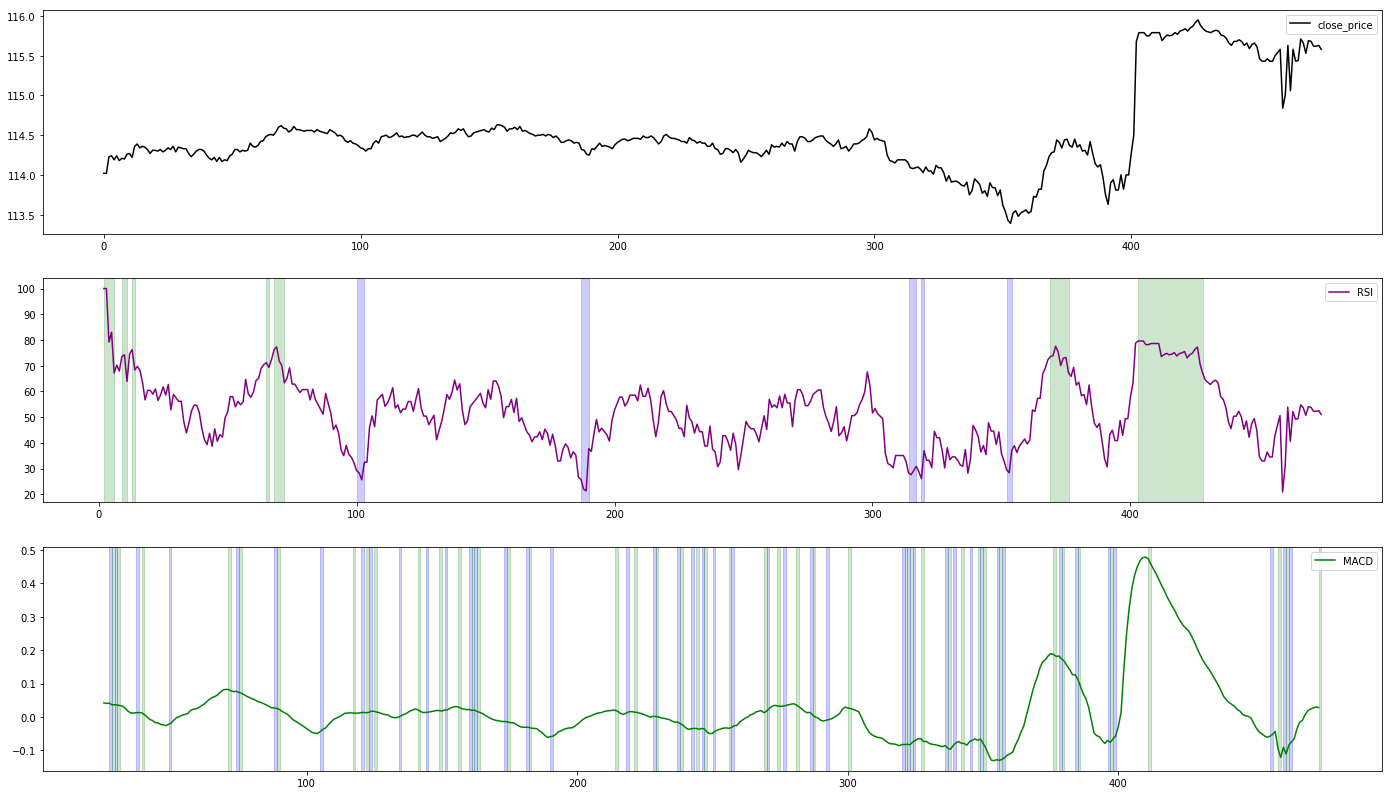

In [44]:
plot_df = sliding_window_df.iloc[0:500]

plt.figure(figsize=(24,14))
plt.subplot(3, 1, 1)
plot_df["close_price"].plot(color="black")
plt.legend()

plt.subplot(3, 1, 2)
ax1 = plot_df["RSI"].plot(color="purple")
# Show oversold zone
color_zone(ax1, plot_df[plot_df["RSI_oversold"]].index, 0.2, "blue")
# Show overbought zone
color_zone(ax1, plot_df[plot_df["RSI_overbought"]].index, 0.2, "green")
plt.legend()

plt.subplot(3, 1, 3)
ax3 = plot_df["MACD"].plot(color="green")
# Show crossover moments
for x in plot_df[plot_df["MACD_crossover"]].index:
    ax3.axvspan(x, x+1, alpha=0.2, color="blue")      
# Show crossunder moments
for x in plot_df[plot_df["MACD_crossunder"]].index:
    ax3.axvspan(x, x+1, alpha=0.2, color="green")
plt.legend()

# Create manual bot

In [45]:
# Create dataset for bot
bot_df = sliding_window_df[["open_price","close_price","high_price","low_price","volume","MACD","RSI"]]
bot_df.head()

,open_price,close_price,high_price,low_price,volume,MACD,RSI
0,114.02,114.02,114.02,114.02,6.0,NaN,NaN
1,114.02,114.02,114.02,114.02,10.0,NaN,NaN
2,114.25,114.23,114.26,114.17,27504.0,NaN,100.000000
3,114.19,114.24,114.26,114.19,8531.0,NaN,100.000000
4,114.24,114.19,114.24,114.18,7213.0,NaN,79.197623


In [56]:
from bot import TradingBot

# Test bot
bot = TradingBot(stop_loss=0.02)

bot.reset()

for index, data in bot_df.iterrows():
    bot.process(data)

bot.profit * 100

-0.04069811309025523

# Test bot on different stocks

In [49]:
def test_bot_profit(df):
    # Preprocess data
    bot_df = preprocess_data(df)
    # Select columns
    bot_df = bot_df[["open_price","close_price","high_price","low_price","volume","MACD","RSI"]]

    # Create bot instance
    bot = TradingBot(stop_loss=0.02)
    # Reset bot
    bot.reset()
    # Run bot
    for index, data in bot_df.iterrows():
        bot.process(data)

    return bot.profit * 100

In [50]:
bot_profit_df = pd.DataFrame()

for stock_name, stock_df in df.groupby("name"):
    profit = test_bot_profit(stock_df)

    bot_profit_df = bot_profit_df.append({"name":stock_name,"profit":profit}, ignore_index=True)

bot_profit_df

,name,profit
0,AT&T,0.133293
1,AbbVie,0.000000
2,Accenture,-0.406222
3,Activision Blizzard,-0.905088
4,Adobe,0.273151
...,...,...
331,Xylem,0.000000
332,Zimmer Biomet Holdings,0.442973
333,Zions Bancorporation,-1.562781
334,Zoetis,2.357143


In [51]:
bot_profit_df.sort_values("profit")

,name,profit
20,American Airlines Group,-4.532855
178,LG Display,-4.413920
130,General Electric Company,-4.264241
272,Southwest Airlines,-4.000000
30,Apple,-3.381890
...,...,...
238,PetroChina,4.928900
164,JD.com,5.007850
140,Hasbro,5.212209
129,General Dynamics,6.677903
